In [17]:
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

In [18]:
data_path='./Dataset'
images=[]
class_list=[]
label_class=["Broccoli", "Carrot", "Cucumber", "Tomato"]


In [ ]:
for i, label in enumerate(label_class):
    img_dir=os.path.join(data_path, label)              #looping tp dikaish kek (0, Broccoli) gt2
    for j, img in enumerate(os.listdir(img_dir)):
        img_path=os.path.join(img_dir, img)             #dptin path image
        img=load_img(img_path, target_size=(200,200))   #load image
        img=img_to_array(img)                           #jd array
        img=tf.image.rgb_to_grayscale(img)              #jd grayscale
        img=img/255.0                                   #normalisasi
        images.append(img)
        class_list.append(i)
        if j>500:
            break

In [22]:
images[0].shape

TensorShape([200, 200, 1])

In [20]:
y=tf.keras.utils.to_categorical(class_list, num_classes=len(label_class))
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [21]:
x=np.asarray(images)

In [23]:
x_train, x_temp, y_train, y_temp=train_test_split(x,y,test_size=0.2, random_state=42) #100->80:20
x_val, x_test, y_val, y_test=train_test_split(x_temp,y_temp,test_size=0.5, random_state=42) #20->10:10

In [24]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(200,200,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(len(label_class), activation="softmax")
])

In [26]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 80000)            

In [27]:
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

In [29]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=earlyStopping)

Epoch 1/10
50/50 [==============================] - 57s 1s/step - loss: 1.1542 - accuracy: 0.4600 - val_loss: 0.6848 - val_accuracy: 0.7850
Epoch 2/10
50/50 [==============================] - 51s 1s/step - loss: 0.6527 - accuracy: 0.7644 - val_loss: 0.4400 - val_accuracy: 0.8700
Epoch 3/10
50/50 [==============================] - 51s 1s/step - loss: 0.4131 - accuracy: 0.8425 - val_loss: 0.3418 - val_accuracy: 0.9150
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.2835 - accuracy: 0.8963 - val_loss: 0.3472 - val_accuracy: 0.8850
Epoch 5/10
50/50 [==============================] - 54s 1s/step - loss: 0.1923 - accuracy: 0.9312 - val_loss: 0.3436 - val_accuracy: 0.8900
Epoch 6/10
50/50 [==============================] - 59s 1s/step - loss: 0.1611 - accuracy: 0.9400 - val_loss: 0.3214 - val_accuracy: 0.8950
Epoch 7/10
50/50 [==============================] - 59s 1s/step - loss: 0.1072 - accuracy: 0.9631 - val_loss: 0.2711 - val_accuracy: 0.9050
Epoch 8/10
50/50 [==

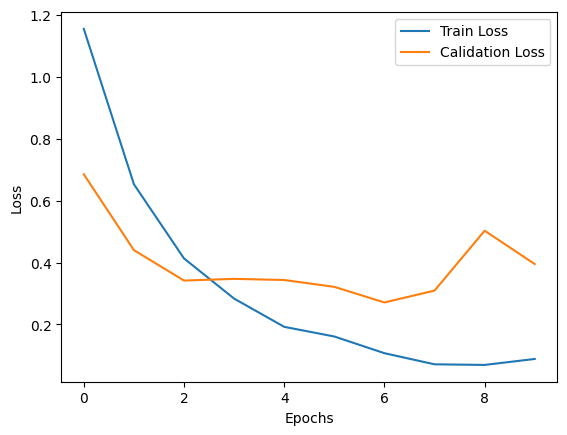

In [30]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Calidation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

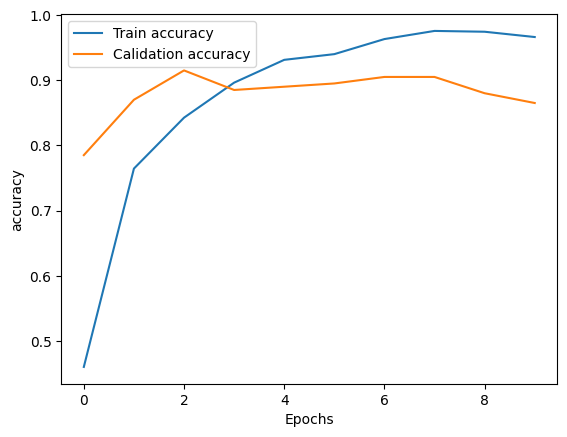

In [31]:
plt.plot(history.history['accuracy'], label="Train accuracy")
plt.plot(history.history['val_accuracy'], label="Calidation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [32]:
loss,acc=model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 238ms/step - loss: 0.5896 - accuracy: 0.8400


In [36]:
from sklearn.metrics import r2_score

In [33]:
model.predict(x_test)

7/7 [==============================] - 2s 197ms/step


array([[3.00190270e-01, 4.42664891e-08, 6.99791491e-01, 1.81721389e-05],
       [1.24994822e-01, 5.18043282e-11, 1.69239230e-02, 8.58081222e-01],
       [2.09747133e-18, 9.99999881e-01, 1.28625132e-07, 2.29068446e-13],
       [1.42284835e-05, 7.42697739e-05, 3.90860223e-04, 9.99520659e-01],
       [1.00000000e+00, 2.81828614e-15, 3.79763510e-09, 3.45461011e-08],
       [1.72071755e-01, 5.73515026e-05, 7.98547268e-01, 2.93235742e-02],
       [9.23743893e-24, 9.99552667e-01, 4.47258033e-04, 3.65241379e-11],
       [3.11343700e-01, 6.76381717e-07, 3.25941555e-02, 6.56061471e-01],
       [9.99800980e-01, 5.33035716e-17, 1.99043221e-04, 1.92785191e-10],
       [9.99869585e-01, 8.70536088e-09, 1.72044838e-05, 1.13257709e-04],
       [5.16293076e-05, 9.42701348e-08, 9.99902487e-01, 4.57776441e-05],
       [9.99996305e-01, 2.75745117e-12, 9.68805352e-07, 2.68784538e-06],
       [8.87802614e-08, 7.59434613e-07, 9.99999046e-01, 2.32741844e-08],
       [1.15631978e-04, 7.52518326e-02, 5.32812595e

In [37]:
r2_score(y_test, model.predict(x_test))

7/7 [==============================] - 2s 327ms/step


0.6877036322350302

In [38]:
model.save("cnn.h5")

In [39]:
model_load=tf.keras.models.load_model("cnn.h5")